# UE1: Combine Experiments
_Are the provided data normally distributed? Visualize the distribution of the data to confirm or rebut the normal distribution._

_Why is a normal distribution relevant for data analysis? How to decide if data are not showing a Gaussian Distribution?_

To answer these questions first a statistical summary of the data is analyzed, and then conclusions from visualization of a frequency distribution and a Q-Q plot are drawn concerning the normality of the data distribution.

In [3]:
import pandas as pd
data = pd.read_csv('stats2_1.csv')
data.describe()

,107
count,986.000000
mean,100.286004
std,14.709690
min,51.000000
25%,90.000000
50%,100.000000
75%,110.000000
max,158.000000


In this first cell the pandas library is imported, to read the data from 'stats2_1.csv' into the 'data' file in notebook. Also key data calculated from this file to give a first impression about the symmetry of the data. In this case the mean and the median (50%) are almost equal which is often a indicator for symmetry (key feature in normal distribution). For normal distribution, about 68% of the data should fall within one standard deviation from the mean which could well be true for this distribution (between 85.58 and 114.99 in this case). The 25% and 75% values are both equally distanced to the median which would also speak for a symmetrical distribution. However, the range from 51 to 158 is quite wide, so the actual shape of distribution can't be determined through this statistic summary alone. 

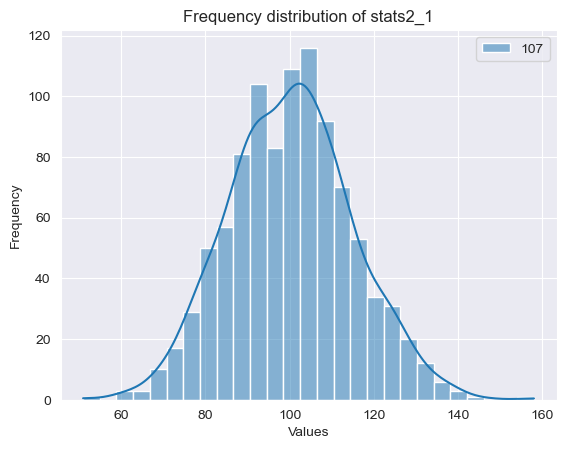

In [4]:
import matplotlib.pyplot as plot
import seaborn as sns
sns.histplot(data, kde=True)
plot.title('Frequency distribution of stats2_1')
plot.xlabel('Values')
plot.ylabel('Frequency')
plot.show()

To understand the frequency distribution of the data, a histogram along with a Kernel Density Estimate (KDE - blue line smoothing histogram) is plotted. The plot reveales a bell-shaped curve centered around the mean value of 100.29, with a smooth transition toward the tails. The presence of a pronounced peak at the center of the distribution suggests that most values cluster around the mean, which is a characteristic of normal distributions and resembles a gaussian bell curve.

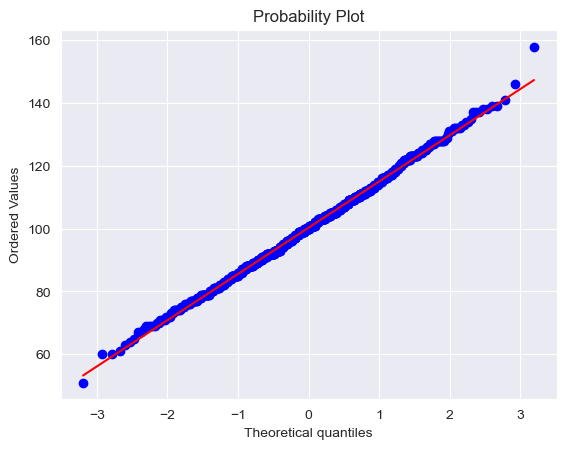

In [5]:
import scipy.stats as stats
stats.probplot(data.iloc[:,0], dist='norm', plot=plot)
plot.show()

A Quantile-Quantile (Q-Q) plot was also generated to assess the normality of the dataset and compare the quantiles of the dataset against the quantiles of a theoretical (in this case normal) distribution. In the Q-Q plot, if the data points fall approximately along the straight reference line, it indicates that the data is normally distributed. In this case, the violet points - intersection of data quantiles and normal quantiles - closely align with the red line, confirming that the distribution of values does not significantly deviate from normality. The two points at the end scattering from the line indicate more extreme values than would be expected from a normal distribution and light tails (negligible deviation). There is no 'perfect' underlying normal distribution and symmetry in the data, but still the assumption of normal distribution should work. If dataset were bigger maybe a perfect normal distribution could be reached.

In [6]:
shapiro_test = stats.shapiro(data)
print('Shapiro-Wilk Test Statistic:', shapiro_test.statistic)
print('p-value:', shapiro_test.pvalue)

Shapiro-Wilk Test Statistic: 0.9981548750358384
p-value: 0.3656331977441202


Finally to solidify the conclusion about a normal distribution for the dataset a Shapiro Wilk test is done. This test is based on a null hypothesis, that the distribution is gaussian and a chosen significance level (0.05 - 5% chance of falsely rejecting null hypothesis). If the p-value is less than the significance level, you reject the null hypothesis that the data is normally distributed. For this distribution the p-value is greater than 0.05 which indicates that there is not enough deviation from a normal distribution to reject the null hypothesis. The conclusion of a gaussian distribution of the data stands. 

### Why is a normal distribution relevant for data analysis? 
The normal distribution plays a fundamental role in data analysis, particularly due to the message of __Central Limit Theorem (CLT)__ and how normality assumption is applicable for a large range of data. According to the CLT, regardless of the original distribution of the data, when the sample size is sufficiently large, the distribution of the sample means will approximate a normal distribution. This is also a key reason why normal distributions are central to many statistical inference methods.

Another advantage of normal distributions is that they __simplify data interpretation__. Due to their consistent properties and symmetry (mean = median = mode), estimation of key characteristics mean and standard deviation is straightforward. These parameters are critical for summarizing data, comparing it and drawing conclusions making the normal distribution particularly useful in practice. Additionally, the empirical 68-95-99.7 rule is a helpful guide in understanding data variability: about 68% of data points fall within one standard deviation of the mean, 95% within two, and 99.7% within three. 

Gaussian distributions are also valuable for __parameter estimation__. For example, Maximum Likelihood Estimation (MLE) takes advantage of the mathematical properties of normal distributions to estimate distribution parameters from a sample.

Normal distributions also serve as framework for __hypothesis testing__. Many statistical tests like t-test, z-test, regressions analysis rely on assumption that data follows a normal distribution. Making it a critical tool for accurate and reliable data analysis.

### How to decide if data are not showing a Gaussian Distribution?
To determine if data is following a normal distribution or not, there are several combinations of visual methods and statistical tests. But also a significant difference of mean and median can already give conclusions about the non symmetry of data.

__Visual analysis__ to determine normality of data is done with frequency distributions (histogram) and Q-Q plots. For a gaussian distribution the histogram should show a symmetrical, bell-shaped curve. If the distribution is skewed (leaning left or right), has multiple peaks, or is very flat or sharp, it may not be normal. A Q-Q plot compares your data's quantiles to those of a standard normal distribution. If the data are normally distributed, the points should fall roughly along a straight line. Significant deviations from the line indicate non-normality. For example a longer tail to the left indicates left skewness.

Testing the normal distribution of data with __statistical methods__ can include Shapiro-Wilk test or the Kolmogorov-Smirnov test. The null hypothesis for these tests is that the variable follows a normal distribution, so a  small P values would be evidence against normality. For very large datasets, even small deviations from normality may be detected by statistical tests (e.g., Shapiro-Wilk) due to their sensitivity. These tests should always be interpreted alongside with visual methods to get more information about the practical significance of non-normality.